# LIVE MNIST 

The LIVE MNIST project aims to create an interactive and dynamic visualization of the training, validation, and testing process for the well-known MNIST dataset. Users will be able to configure the number of layers and nodes in a Convolutional Neural Network (CNN) and observe a live representation of the model’s structure and learning progress directly on a web interface. Additionally, the project will feature an interactive drawing tool where users can sketch digits in real-time and instantly see the model’s predicted probabilities for each number, making the experience both educational and engaging.

1) MODEL rep

In [10]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [27]:
train_x = "dataset/train-images.idx3-ubyte"
train_y = "dataset/train-labels.idx1-ubyte"
test_x = "dataset/t10k-images.idx3-ubyte"
test_y = "dataset/t10k-labels.idx1-ubyte"


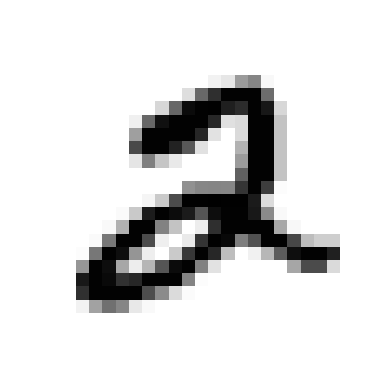

In [50]:
def cargar_mnist_imagenes(archivo, num_imagenes):

    with open(archivo, "rb") as f:
        f.read(16)  
        datos = np.frombuffer(f.read(num_imagenes * 28 * 28), dtype=np.uint8)
        return datos.reshape(num_imagenes, 28, 28)

def mostrar_imagen(pixels):

    imagen = np.array(pixels, dtype=np.uint8).reshape(28, 28)
    plt.imshow(imagen, cmap="gray_r")
    plt.axis("off")
    plt.show()

ruta_imagenes = "./dataset/train-images.idx3-ubyte"
imagenes = cargar_mnist_imagenes(ruta_imagenes, num_imagenes=10)


mostrar_imagen(imagenes[5])